<a href="https://colab.research.google.com/github/sathish0416/LDA/blob/main/LDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Data Preparation
Training set shape: (124, 13)
Test set shape: (54, 13)

Step 2: Training Models

Step 3: Model Evaluation

LDA Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Confusion Matrix:
[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54


Logistic Regression Results:
Accuracy: 0.9815
Precision: 0.9827
Recall: 0.9815
F1-Score: 0.9816

Confusion Matrix:
[[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


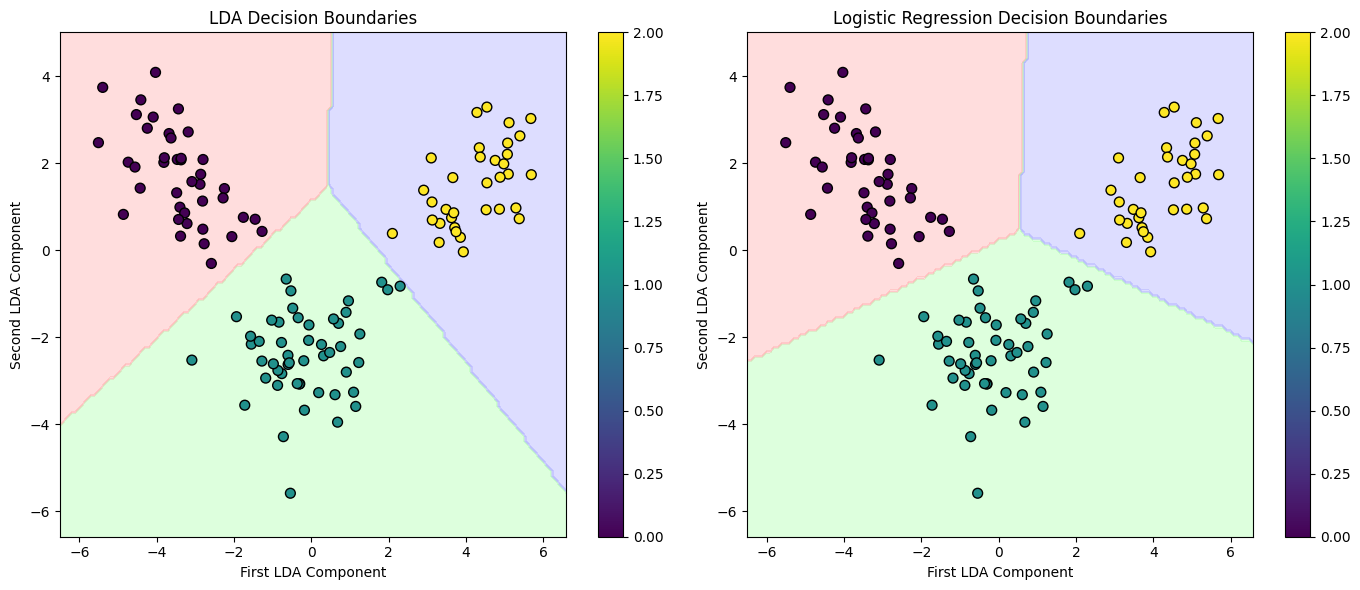


Step 5: Comparative Analysis
Model Comparison Summary:
1. Classification Performance:
   LDA Accuracy: 1.0000
   Logistic Regression Accuracy: 0.9815

2. Computational Aspects:
   - LDA assumes normal distribution with equal covariance.
   - Logistic Regression makes no assumptions about data distribution.

3. Model Interpretability:
   - LDA provides feature importance through discriminants.
   - Logistic Regression provides feature importance through coefficients.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_recall_fscore_support,
                             confusion_matrix, classification_report)
from matplotlib.colors import ListedColormap

def lab2_lda_classification():

    print("Step 1: Data Preparation")
    wine = load_wine()
    X, y = wine.data, wine.target


    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )


    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"Training set shape: {X_train_scaled.shape}")
    print(f"Test set shape: {X_test_scaled.shape}")


    print("\nStep 2: Training Models")


    lda = LDA()
    lda.fit(X_train_scaled, y_train)


    lr = LogisticRegression(multi_class='multinomial', max_iter=1000)
    lr.fit(X_train_scaled, y_train)


    def evaluate_model(model, X, y_true, name):
        y_pred = model.predict(X)
        accuracy = accuracy_score(y_true, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_true, y_pred, average='weighted'
        )
        conf_matrix = confusion_matrix(y_true, y_pred)

        print(f"\n{name} Results:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")
        print("\nConfusion Matrix:")
        print(conf_matrix)
        print("\nClassification Report:")
        print(classification_report(y_true, y_pred))

        return conf_matrix, accuracy, precision, recall, f1

    print("\nStep 3: Model Evaluation")
    lda_metrics = evaluate_model(lda, X_test_scaled, y_test, "LDA")
    lr_metrics = evaluate_model(lr, X_test_scaled, y_test, "Logistic Regression")


    def plot_decision_boundaries(X, y, models, model_names):

        lda_viz = LDA(n_components=2)
        X_2d = lda_viz.fit_transform(X, y)

        x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
        y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                             np.arange(y_min, y_max, 0.1))

        cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

        plt.figure(figsize=(14, 6))

        for idx, (model, name) in enumerate(zip(models, model_names)):
            plt.subplot(1, 2, idx + 1)


            model_2d = model.__class__()
            model_2d.fit(X_2d, y)


            Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)

            plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)


            scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
            plt.colorbar(scatter)

            plt.title(f'{name} Decision Boundaries')
            plt.xlabel('First LDA Component')
            plt.ylabel('Second LDA Component')

        plt.tight_layout()
        plt.show()

    print("\nStep 4: Plotting Decision Boundaries")
    plot_decision_boundaries(X_train_scaled, y_train, [lda, lr], ["LDA", "Logistic Regression"])


    print("\nStep 5: Comparative Analysis")
    print("Model Comparison Summary:")
    print("1. Classification Performance:")
    print(f"   LDA Accuracy: {lda_metrics[1]:.4f}")
    print(f"   Logistic Regression Accuracy: {lr_metrics[1]:.4f}")
    print("\n2. Computational Aspects:")
    print("   - LDA assumes normal distribution with equal covariance.")
    print("   - Logistic Regression makes no assumptions about data distribution.")
    print("\n3. Model Interpretability:")
    print("   - LDA provides feature importance through discriminants.")
    print("   - Logistic Regression provides feature importance through coefficients.")

if __name__ == "__main__":
    lab2_lda_classification()
